In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
import seaborn as sns
from fbprophet.plot import add_changepoints_to_plot
from statsmodels.tsa.seasonal import seasonal_decompose

In [59]:
path= "/Users/pujasonawane/Documents/Data mining 2/Avocado project/"

In [60]:
avo_df= pd.read_csv(f"{path}avocado.csv")

In [61]:
avo_df.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12/27/15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12/20/15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12/13/15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12/6/15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11/29/15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [62]:
avo_df=pd.DataFrame(avo_df)

In [63]:
avo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [64]:
avo_df.isna().any()

Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [65]:
print(avo_df['region'].unique())

['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


In [66]:
avo_df['Date']=pd.to_datetime(avo_df['Date'])

In [67]:
#sort the data in descending order wrt date 
avo_df=avo_df.sort_values('Date')

In [68]:
price_range=avo_df['AveragePrice'].max()-avo_df['AveragePrice'].min()

In [69]:
print(price_range)

2.81


(array([  26.,  103.,  290.,  620.,  966., 1630., 1737., 1750., 1553.,
        1660., 1644., 1472., 1177., 1077.,  829.,  524.,  380.,  254.,
         193.,  123.,   59.,   66.,   42.,   34.,   27.,    9.,    2.,
           2.]),
 array([0.44      , 0.54035714, 0.64071429, 0.74107143, 0.84142857,
        0.94178571, 1.04214286, 1.1425    , 1.24285714, 1.34321429,
        1.44357143, 1.54392857, 1.64428571, 1.74464286, 1.845     ,
        1.94535714, 2.04571429, 2.14607143, 2.24642857, 2.34678571,
        2.44714286, 2.5475    , 2.64785714, 2.74821429, 2.84857143,
        2.94892857, 3.04928571, 3.14964286, 3.25      ]),
 <a list of 28 Patch objects>)

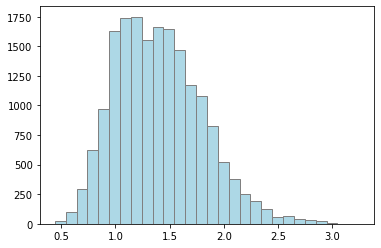

In [70]:
#distribution of data 
plt.hist(avo_df['AveragePrice'], color='lightblue',edgecolor='gray', bins=28)

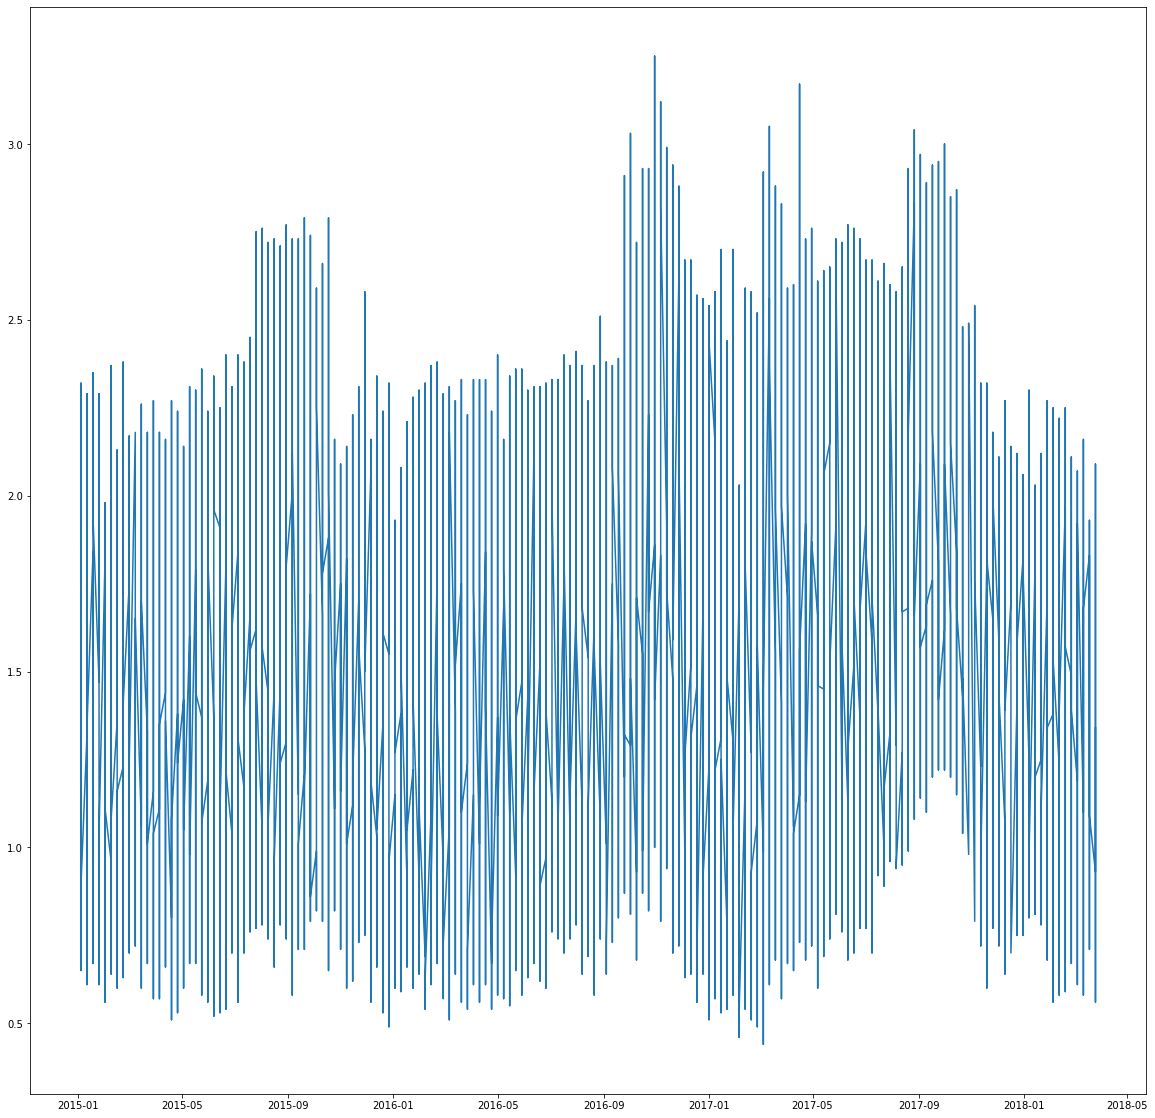

In [71]:
plt.figure(figsize=(20,20))
plt.plot(avo_df['Date'],avo_df['AveragePrice'])

In [72]:
data=avo_df[['Date','AveragePrice']].copy()

In [73]:
data=pd.DataFrame(data)
data

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [74]:
data=data.rename(columns={'Date':'ds', 'AveragePrice':'y'})
data

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [75]:
data

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [77]:
model= Prophet(changepoint_range=0.9,changepoints=['2015-11-29','2016-02-28',' 2016-07-24','2017-04-30','2017-12-24'])
               #changepoints=['2015-02-08','2015-08-16',' 2016-02-21','2017-03-05','2017-08-06'])
#model.add_country_holidays(country_name='US')
model.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [78]:
forecast=model.make_future_dataframe(periods=256)

In [79]:
forecast=model.predict(forecast)

In [80]:
#forecast[['yearly']]
model.changepoints

DatetimeIndex(['2015-11-29', '2016-02-28', '2016-07-24', '2017-04-30',
               '2017-12-24'],
              dtype='datetime64[ns]', freq=None)

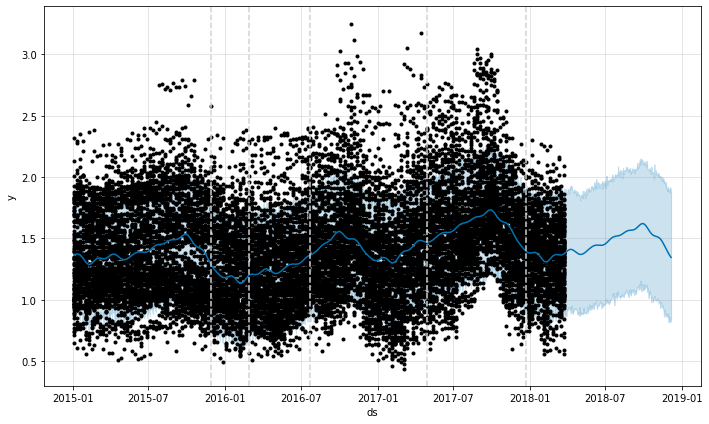

In [81]:
forecast_graph = model.plot(forecast)
#fig2 = add_changepoints_to_plot(forecast_graph.gca(), model, forecast)
for changepoint in model.changepoints:
    plt.axvline(changepoint,c='lightgray',ls='--', lw=1.5)

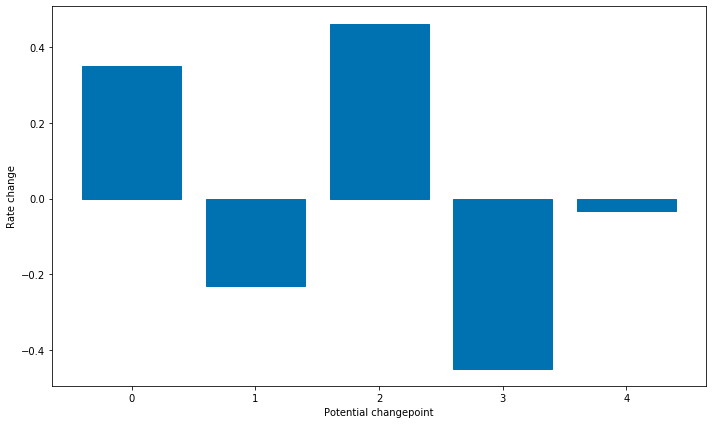

In [82]:
deltas = model.params['delta'].mean(0)
fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas, facecolor='#0072B2', edgecolor='#0072B2')
#ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('Potential changepoint')
fig.tight_layout()

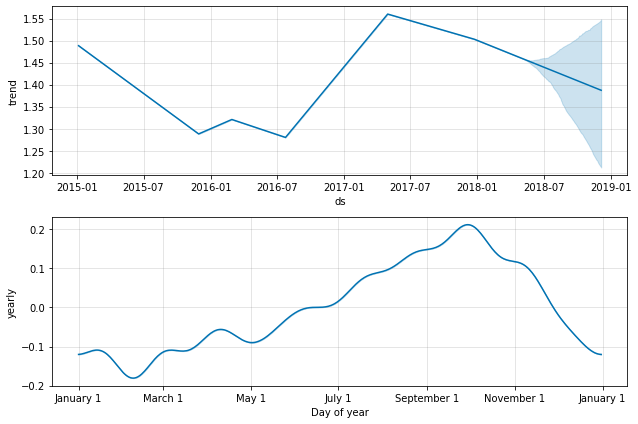

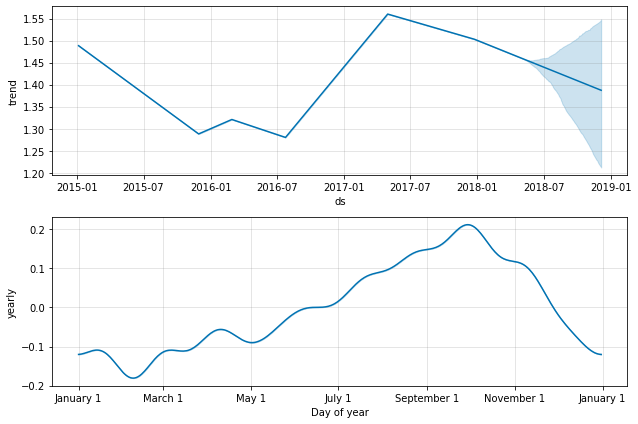

In [83]:
model.plot_components(forecast)